In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import os
from os import listdir

In [ ]:
listdir("/kaggle/input")

In [ ]:
listdir("/kaggle/input/real-life-industrial-dataset-of-casting-product")

In [ ]:
listdir("/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data")

In [ ]:
listdir("/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train")

In [ ]:
listdir("/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train/def_front")

In [ ]:
from PIL import Image
img = Image.open("/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train/def_front/cast_def_0_3040.jpeg")
img

In [ ]:
from PIL import Image
img = Image.open("/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train/def_front/cast_def_0_3021.jpeg")
img

In [ ]:
from PIL import Image
img = Image.open("/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train/def_front/cast_def_0_5595.jpeg")
img

In [ ]:
listdir("/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train/ok_front")

In [ ]:
from PIL import Image
img = Image.open("/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train/ok_front/cast_ok_0_2038.jpeg")

In [ ]:
img

In [ ]:
from keras.preprocessing.image import load_img

In [ ]:
img=load_img("/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train/ok_front/cast_ok_0_2038.jpeg")

In [ ]:
img

In [ ]:
img.size

In [ ]:
import numpy as np
img=np.array(img)

In [ ]:
img.shape

In [9]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

In [23]:
# load and iterate training dataset
train_it = datagen.flow_from_directory('/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train', class_mode='binary',target_size=(256,256),batch_size=64)
# load and iterate test dataset
test_it = datagen.flow_from_directory('/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/test', class_mode='binary',target_size=(256,256), batch_size=64)

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [24]:
train_it.class_indices

{'def_front': 0, 'ok_front': 1}

In [29]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
model=Sequential()
def ima():
  model=Sequential()
  model.add(Conv2D(10,(3,3),padding="same",activation="relu",input_shape=(256,256, 3)))
  model.add(MaxPooling2D((2,2),strides=(2,2)))
  model.add(Flatten())
  model.add(Dense(16, activation="relu", kernel_initializer="he_uniform"))
  model.add(Dense(1, activation="sigmoid"))
  opt = Adam(lr=0.01)
  model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
  return model 


In [30]:
model=ima()

In [31]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 256, 256, 10)      280       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 10)      0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 163840)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                2621456   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 2,621,753
Trainable params: 2,621,753
Non-trainable params: 0
_________________________________________________________________


In [32]:
results = model.fit_generator(train_it,epochs=20,validation_data=test_it,verbose=1)

Epoch 1/20
104/104 [==============================] - 40s 387ms/step - loss: 502.3345 - accuracy: 0.5623 - val_loss: 0.6311 - val_accuracy: 0.6336
Epoch 2/20
104/104 [==============================] - 28s 271ms/step - loss: 0.6219 - accuracy: 0.5935 - val_loss: 0.5598 - val_accuracy: 0.7021
Epoch 3/20
104/104 [==============================] - 27s 259ms/step - loss: 0.5571 - accuracy: 0.6810 - val_loss: 0.5371 - val_accuracy: 0.7203
Epoch 4/20
104/104 [==============================] - 26s 255ms/step - loss: 0.5046 - accuracy: 0.7241 - val_loss: 0.5372 - val_accuracy: 0.7343
Epoch 5/20
104/104 [==============================] - 26s 255ms/step - loss: 0.4719 - accuracy: 0.7419 - val_loss: 0.5525 - val_accuracy: 0.7315
Epoch 6/20
104/104 [==============================] - 27s 256ms/step - loss: 0.4488 - accuracy: 0.7520 - val_loss: 0.5635 - val_accuracy: 0.7497
Epoch 7/20
104/104 [==============================] - 27s 261ms/step - loss: 0.4273 - accuracy: 0.7674 - val_loss: 0.5338 - val_

In [34]:
import matplotlib.pyplot as plt

In [35]:
from matplotlib import pyplot

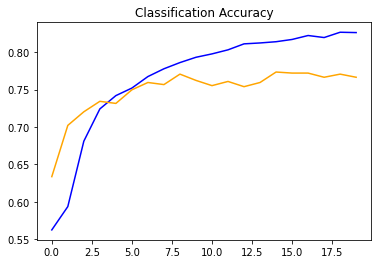

In [38]:
pyplot.title("Classification Accuracy")
pyplot.plot(results.history["accuracy"], color="blue", label="train")
pyplot.plot(results.history["val_accuracy"], color="orange", label="test")

Lets Use Transfer Learning

In [43]:
from keras import Model

In [45]:
## example of loading the vgg16 model
from keras.applications.vgg16 import VGG16


In [67]:
# define cnn model
def define_model():
    model = VGG16(include_top=False, input_shape=(256,256, 3))
    #mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False

    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(64, activation="relu", kernel_initializer="he_uniform")(flat1)
    class1 = Dense(32, activation="relu", kernel_initializer="he_uniform")(class1)
    class1 = Dense(16, activation="relu", kernel_initializer="he_uniform")(class1)
    output = Dense(1, activation="sigmoid")(class1)
# define new model
    model = Model(inputs=model.inputs, outputs=output)
# compile model
    opt = Adam(lr=0.01)
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
    return model

In [68]:
model1=define_model()

In [69]:
model1.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)     

In [70]:
results = model1.fit_generator(train_it,epochs=5,validation_data=test_it,verbose=1)

Epoch 1/10
104/104 [==============================] - 30s 286ms/step - loss: 10.9238 - accuracy: 0.8930 - val_loss: 0.2015 - val_accuracy: 0.9804
Epoch 2/10
104/104 [==============================] - 30s 287ms/step - loss: 0.1426 - accuracy: 0.9896 - val_loss: 0.2130 - val_accuracy: 0.9706
Epoch 3/10
104/104 [==============================] - 29s 280ms/step - loss: 0.1462 - accuracy: 0.9908 - val_loss: 0.0795 - val_accuracy: 0.9958
Epoch 4/10
104/104 [==============================] - 30s 288ms/step - loss: 0.0920 - accuracy: 0.9931 - val_loss: 0.3292 - val_accuracy: 0.9650
Epoch 5/10
104/104 [==============================] - 30s 285ms/step - loss: 0.0597 - accuracy: 0.9950 - val_loss: 0.1639 - val_accuracy: 0.9930
Epoch 6/10
104/104 [==============================] - 30s 288ms/step - loss: 0.0372 - accuracy: 0.9967 - val_loss: 0.0892 - val_accuracy: 0.9958
Epoch 7/10
104/104 [==============================] - 29s 282ms/step - loss: 0.0402 - accuracy: 0.9962 - val_loss: 0.1303 - val_a

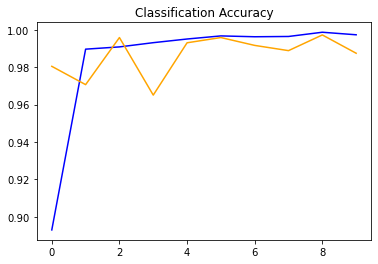

In [71]:
pyplot.title("Classification Accuracy")
pyplot.plot(results.history["accuracy"], color="blue", label="train")
pyplot.plot(results.history["val_accuracy"], color="orange", label="test")